In [14]:
import pandas as pd
df = pd.read_csv('smoking_health_data_final.csv')
df.head()

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol
0,54,male,yes,95,110/72,NaN,219.0
1,45,male,yes,64,121/72,NaN,248.0
2,58,male,yes,81,127.5/76,NaN,235.0
3,42,male,yes,90,122.5/80,NaN,225.0
4,42,male,yes,62,119/80,NaN,226.0


In [15]:
# Creating a copy of the DataFrame for processing
data_clean = df.copy()

In [16]:
#Handle missing values
missing_values = data_clean.isnull().sum
missing_values()

age                0
sex                0
current_smoker     0
heart_rate         0
blood_pressure     0
cigs_per_day      14
chol               7
dtype: int64

In [17]:
#Impute missing numeric values with the median of their respective columns
for column in ['heart_rate','cigs_per_day','chol']:
    median_value = data_clean[column].median()
    data_clean[column].fillna(median_value, inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_11196\1478959627.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_clean[column].fillna(median_value, inplace=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_11196\1478959627.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [18]:
# Split 'blood_pressure' into two separate columns 'systolic_bp and diastolic_bp'
data_clean[['systolic_bp','diastolic_bp']] = data_clean['blood_pressure'].str.split('/', expand=True).astype(float)

#Drop the original 'blood_pressure' colum
data_clean.drop(columns=['blood_pressure'], inplace=True)

In [29]:
# Summarize key statistics for each variable
summary_statistics = data_clean.describe().T
summary_statisitics['range'] = summary_statisitics['max'] - summary_statisitics['min']
summary_statistics

NameError: name 'summary_statisitics' is not defined

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#Setting the aestheitc style of the plots
sns.set_style('whitegrid')

In [25]:
#Create Age Groups
data_clean['age_group']=pd.cut(data_clean['age'], bins=[30,40,50,60,70], labels=['30-40','40-50','50-60','60-70'])

In [28]:
#Ananlyze the distribution of smoking status across different age groups and genders
smoking_status_distribution = pd.crosstab(index=[data_clean['age_group'], data_clean['sex']], columns=data_clean['current_smoker'])
smoking_status_distribution

current_smoker     no  yes
age_group sex             
30-40     female  162  195
          male    111  222
40-50     female  395  389
          male    231  476
50-60     female  451  188
          male    244  303
60-70     female  246   55
          male    128  104

In [30]:
# Calculate the percentage of smokers within each age group and gender category
smoking_status_percentage = smoking_status_distribution.div(smoking_status_distribution.sum(axis=1), axis=0)* 100
smoking_status_percentage

current_smoker           no        yes
age_group sex                         
30-40     female  45.378151  54.621849
          male    33.333333  66.666667
40-50     female  50.382653  49.617347
          male    32.673267  67.326733
50-60     female  70.579030  29.420970
          male    44.606947  55.393053
60-70     female  81.727575  18.272425
          male    55.172414  44.827586

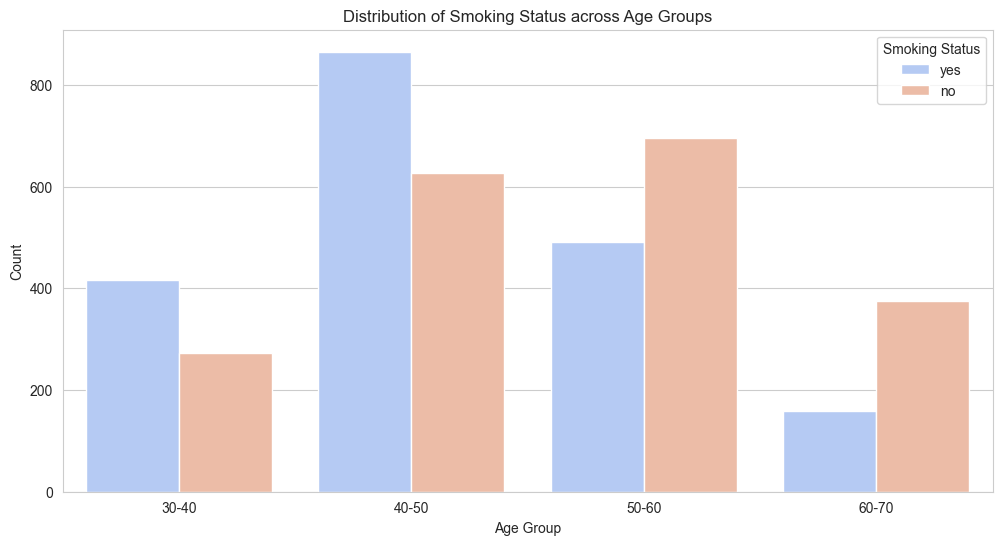

In [31]:
#Visualize the distribution of smoking status across different age groups and genders
plt.figure(figsize=(12,6))
sns.countplot(x='age_group', hue='current_smoker', data=data_clean, palette='coolwarm')
plt.title('Distribution of Smoking Status across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Smoking Status')
plt.show()

<Figure size 1200x600 with 0 Axes>

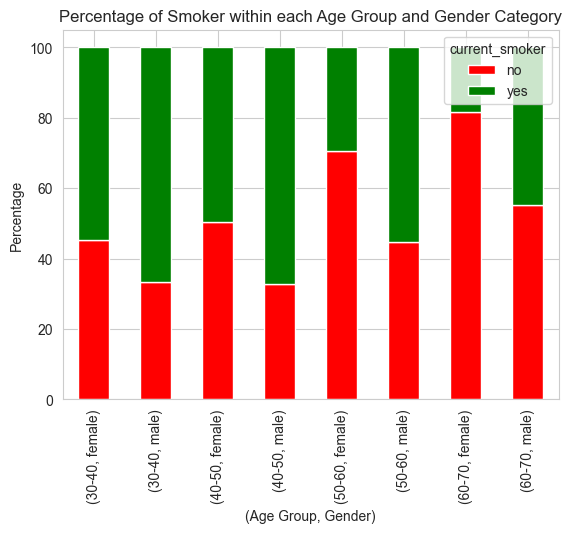

In [33]:
# Visualize the percentage of smokers within each age group and gender category
plt.figure(figsize=(12,6))
smoking_status_percentage.plot(kind='bar', stacked=True, color=['red','green'])
plt.title('Percentage of Smoker within each Age Group and Gender Category')
plt.xlabel('(Age Group, Gender)')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.show()

In [34]:
#import necessary libraries for statisitical testing
from scipy.stats import ttest_ind

In [35]:
#Select only the relevant columns for health indicators
health_data = data_clean[['current_smoker','heart_rate','systolic_bp','diastolic_bp','chol']]

In [36]:
#Split the data into smokers and non-snokers
smokers = health_data[health_data['current_smoker']=='yes']
non_smokers = health_data[health_data['current_smoker']=='no']

In [38]:
#Visualize the distribution of health indicators for smokers and non-smokers
plt.figure(figsize=(15,5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

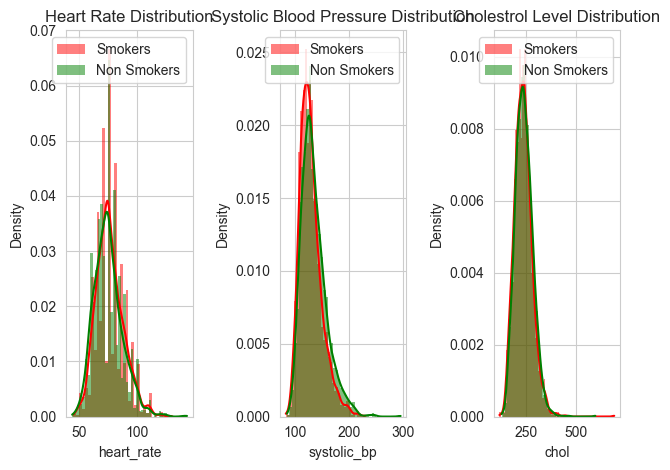

In [45]:
#Heart Rate
plt.subplot(1,3,1)
sns.histplot(smokers['heart_rate'], color ='red', label ='Smokers', kde=True, stat='density', linewidth=0)
sns.histplot(non_smokers['heart_rate'], color ='green', label ='Non Smokers', kde=True, stat='density', linewidth=0)
plt.title('Heart Rate Distribution')
plt.legend()

#Blood Pressure (Systolic)
plt.subplot(1,3,2)
sns.histplot(smokers['systolic_bp'], color ='red', label ='Smokers', kde=True, stat='density', linewidth=0)
sns.histplot(non_smokers['systolic_bp'], color ='green', label ='Non Smokers', kde=True, stat='density', linewidth=0)
plt.title('Systolic Blood Pressure Distribution')
plt.legend()

#Cholestrol Levels
plt.subplot(1,3,3)
sns.histplot(smokers['chol'], color ='red', label ='Smokers', kde=True, stat='density', linewidth=0)
sns.histplot(non_smokers['chol'], color ='green', label ='Non Smokers', kde=True, stat='density', linewidth=0)
plt.title('Cholestrol Level Distribution')
plt.legend()

plt.tight_layout()
plt.show()


In [47]:
#Perform t-tests to assess the differences in means between smokers and non-smokers
t_test_heart_rate = ttest_ind(smokers['heart_rate'], non_smokers['heart_rate'])
t_test_systolic_bp = ttest_ind(smokers['systolic_bp'], non_smokers['systolic_bp'])
t_test_chol = ttest_ind(smokers['chol'], non_smokers['chol'])

print('TTest Results for Heart Rate:', t_test_heart_rate)
print('TTest Results for Systolic Blood Pressure', t_test_systolic_bp)
print('TTest results for Cholestrol Levels',t_test_chol)


TTest Results for Heart Rate: TtestResult(statistic=3.579584820675851, pvalue=0.00034833312553790417, df=3898.0)
TTest Results for Systolic Blood Pressure TtestResult(statistic=-8.528329524098611, pvalue=2.0950010778917888e-17, df=3898.0)
TTest results for Cholestrol Levels TtestResult(statistic=-2.9135033435100053, pvalue=0.0035943048293932767, df=3898.0)


In [48]:
# Analyzing the relationship between the number of cigarettes smoked per day and health indicators
import numpy as np

In [50]:
# Selecting only numerical columns for correlation analysis
numerical_data = data_clean.select_dtypes(include=[np.number])

#Adding 'cigs_per_day' back to the numerical data for correlation analysis
numerical_data['cigs_per_day'] = data_clean['cigs_per_day']

#Calculating correlation matrix
correlation_matrix = numerical_data.corr()

#calculating the correlation matrix focusing on 'cigs_per_day'
correlation_matrix[['cigs_per_day']]


,cigs_per_day
age,-0.191442
heart_rate,0.072258
cigs_per_day,1.000000
chol,-0.026822
systolic_bp,-0.087255
diastolic_bp,-0.051754


In [52]:
# Scatter Plots to visualize the relationship between 'cigs_per_day' and other health indicators
plt.figure(figsize=(18, 5))


<Figure size 1800x500 with 0 Axes>

<Figure size 1800x500 with 0 Axes>

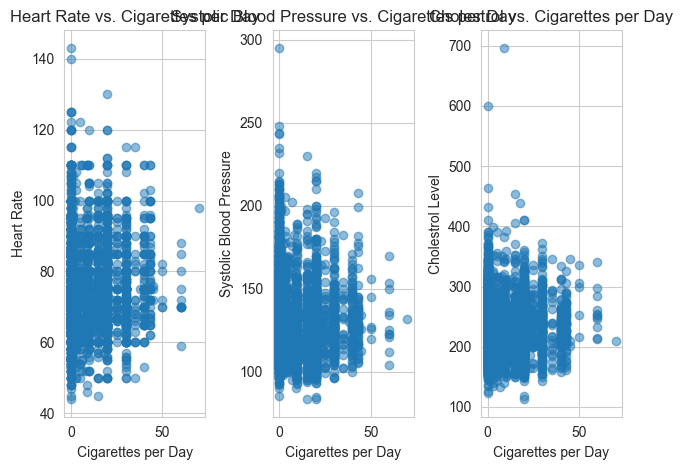

In [55]:
#Heart Rate vs Cigarettes per Day
plt.subplot(1, 3, 1)
plt.scatter(data_clean['cigs_per_day'], data_clean['heart_rate'], alpha = 0.5)
plt.title('Heart Rate vs. Cigarettes per Day')
plt.xlabel('Cigarettes per Day')
plt.ylabel('Heart Rate')

#Systolic Blood Pressure vs. Cigarettes per Day
plt.subplot(1, 3, 2)
plt.scatter(data_clean['cigs_per_day'], data_clean['systolic_bp'], alpha = 0.5)
plt.title('Systolic Blood Pressure vs. Cigarettes per Day')
plt.xlabel('Cigarettes per Day')
plt.ylabel('Systolic Blood Pressure')

#Cholestrol Levels vs. Cigarettes per Day
plt.subplot(1, 3, 3)
plt.scatter(data_clean['cigs_per_day'], data_clean['chol'], alpha = 0.5)
plt.title('Cholestrol vs. Cigarettes per Day')
plt.xlabel('Cigarettes per Day')
plt.ylabel('Cholestrol Level')

plt.tight_layout()
plt.show()

In [56]:
# Group data by age group and smoking status, ensuring the 'observed parameter is set correctly to avoid FutureWarnings
grouped = data_clean.groupby(['age_group','current_smoker'], observed=True)

#Calculate mean values for health indicators within each group
mean_health_data = grouped[['heart_rate','systolic_bp', 'diastolic_bp','chol']].mean()

#Display the mean health data for comparison
mean_health_data

heart_rate  systolic_bp  diastolic_bp        chol
age_group current_smoker                                                   
30-40     no               75.179487   121.836996     79.492674  209.827839
          yes              75.693046   120.862110     78.056355  219.817746
40-50     no               75.263578   129.770767     83.868211  232.014377
          yes              76.776879   126.989595     81.400000  233.908671
50-60     no               74.631655   138.927338     85.644604  250.023022
          yes              76.641548   136.492872     84.301426  245.637475
60-70     no               75.152406   147.862299     86.068182  249.601604
          yes              75.251572   142.927673     84.163522  241.899371

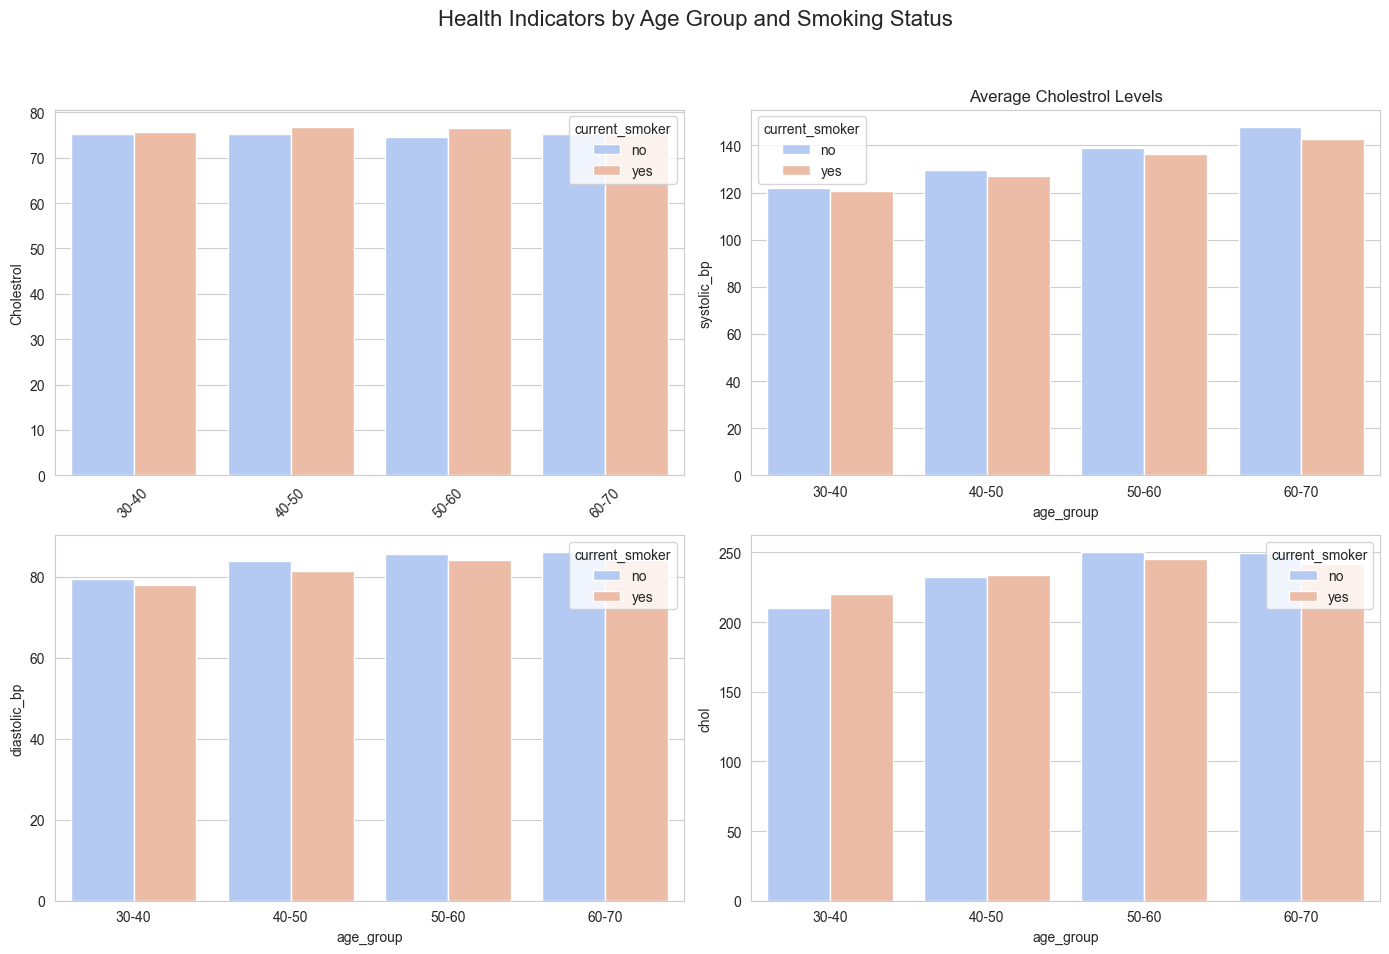

In [61]:
#Visualizing the data
fig, axes = plt.subplots(2, 2, figsize=(14,10))
fig.suptitle('Health Indicators by Age Group and Smoking Status', fontsize=16)

#Heart Rate
mean_health_data_reset = mean_health_data.reset_index()

sns.barplot(ax=axes[0,0], x=mean_health_data_reset['age_group'], y=mean_health_data_reset['heart_rate'], hue=mean_health_data_reset['current_smoker'],palette='coolwarm')
axes[0,1].set_title('Average Heart Rate')
axes[0,0].set_xlabel('')
axes[0,0].set_ylabel('Heart Rate')
axes[0,0].tick_params(axis='x', rotation=45)

#Systolic Blood Pressure
mean_health_data_reset = mean_health_data.reset_index()

sns.barplot(ax=axes[0,1], x=mean_health_data_reset['age_group'], y=mean_health_data_reset['systolic_bp'], hue=mean_health_data_reset['current_smoker'],palette='coolwarm')
axes[0,1].set_title('Average Systolic Blood Pressure')
axes[0,0].set_xlabel('')
axes[0,0].set_ylabel('Systolic BP')
axes[0,0].tick_params(axis='x', rotation=45)

#Diastolic Blood Pressure
#Reset the index of the Dataframe
mean_health_data_reset = mean_health_data.reset_index()

sns.barplot(ax=axes[1,0], x=mean_health_data_reset['age_group'], y=mean_health_data_reset['diastolic_bp'], hue=mean_health_data_reset['current_smoker'],palette='coolwarm')
axes[0,1].set_title('Average Diastolic Blood Pressure')
axes[0,0].set_xlabel('')
axes[0,0].set_ylabel('Diastolic BP')
axes[0,0].tick_params(axis='x',rotation=45)

#Cholestrol Levels
mean_health_data_reset = mean_health_data.reset_index()
sns.barplot(ax=axes[1,1], x=mean_health_data_reset['age_group'], y=mean_health_data_reset['chol'], hue=mean_health_data_reset['current_smoker'],palette='coolwarm')
axes[0,1].set_title('Average Cholestrol Levels')
axes[0,0].set_xlabel('')
axes[0,0].set_ylabel('Cholestrol')
axes[0,0].tick_params(axis='x',rotation=45)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [66]:
# Statistical Analysis: TTests within each group to compare smokers and non-smokers
for age_group in data_clean['age_group'].unique():
    smokers_group = data_clean[(data_clean['age_group'] == age_group)&(data_clean['current_smoker']=='yes')]
    non_smokers_group = data_clean[(data_clean['age_group'] == age_group)&(data_clean['current_smoker']=='no')]
    
    print(f'\nT-Test results for {age_group}:')
    for test_var in ['heart_rate','systolic_bp','diastolic_bp','chol']:
        t_stat, p_val = ttest_ind(smokers_group[test_var].dropna(), non_smokers_group[test_var].dropna())
        print(f'{test_var.capitalize()}: statistic={t_stat:.4f}, p-value={p_val:.4f}')
        


T-Test results for 50-60:
Heart_rate: statistic=2.8541, p-value=0.0044
Systolic_bp: statistic=-1.8654, p-value=0.0624
Diastolic_bp: statistic=-1.8998, p-value=0.0577
Chol: statistic=-1.6343, p-value=0.1025

T-Test results for 40-50:
Heart_rate: statistic=2.4500, p-value=0.0144
Systolic_bp: statistic=-2.9047, p-value=0.0037
Diastolic_bp: statistic=-4.1534, p-value=0.0000
Chol: statistic=0.8724, p-value=0.3831

T-Test results for 30-40:
Heart_rate: statistic=0.5448, p-value=0.5861
Systolic_bp: statistic=-0.8537, p-value=0.3936
Diastolic_bp: statistic=-1.7996, p-value=0.0724
Chol: statistic=3.1432, p-value=0.0017

T-Test results for 60-70:
Heart_rate: statistic=0.0832, p-value=0.9337
Systolic_bp: statistic=-1.9024, p-value=0.0577
Diastolic_bp: statistic=-1.5069, p-value=0.1324
Chol: statistic=-1.9240, p-value=0.0549
